## Generate dataset and perform training

In [1]:
# use this to generate the data for the project
! cd ..; python3 -m src.utils.clean

In [2]:
# package imports
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path

In [4]:
# load the data
train_full = pd.read_json('../out/train.json', orient="split")
test_full = pd.read_json('../out/test.json', orient="split")

train_mini = pd.read_json('../out/train_mini.json', orient="split")
test_mini = pd.read_json('../out/test_mini.json', orient="split")

In [5]:
# global variables
dotenv_path = Path('../prod.env')
load_dotenv(dotenv_path=dotenv_path)
noQueries = 4
noCandids = 5

In [6]:
# custom imports - autoreload reloads your functions when you change them
%load_ext autoreload
%autoreload 2
from sampling import SAMPLING
from llms import PAYLOADS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# sampling approach - llama train samples
llsample = SAMPLING(PAYLOADS.LLAMA_8B, train_mini, noQueries)
llsample.generate_samples(test_mini)

Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request rate limit exceeded"}
Error 429: {"error":"request ra

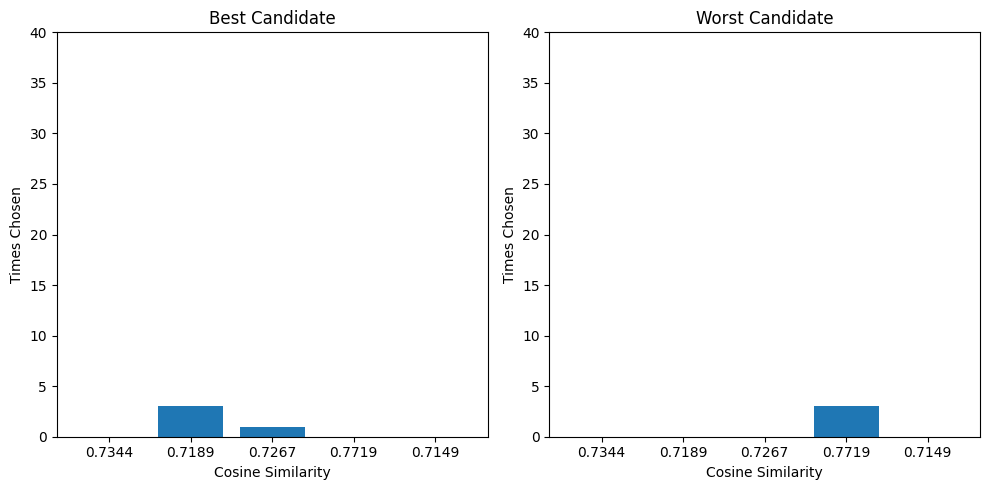

Best Choice: 2  What are the names of the superheroes, their heights in centimeters, and their ranks by height from tallest to shortest, who are published by Marvel Comics?





<Figure size 640x480 with 0 Axes>

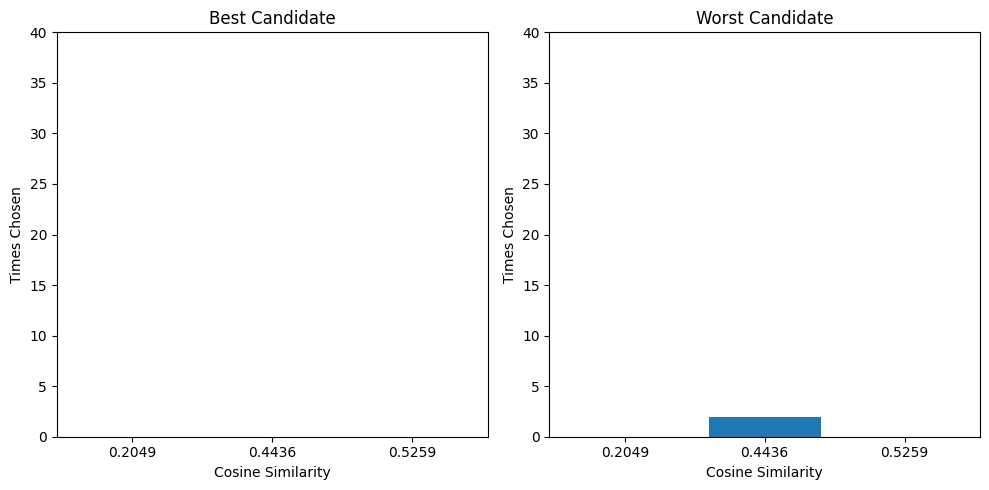

Best Choice: 1  What is the value of the NumTstTakr column from the satscores table, filtered to include only rows where the cds value matches the CDSCode value from the frpm table, which is the highest `FRPM Count (K-12)` value from the frpm table?





<Figure size 640x480 with 0 Axes>

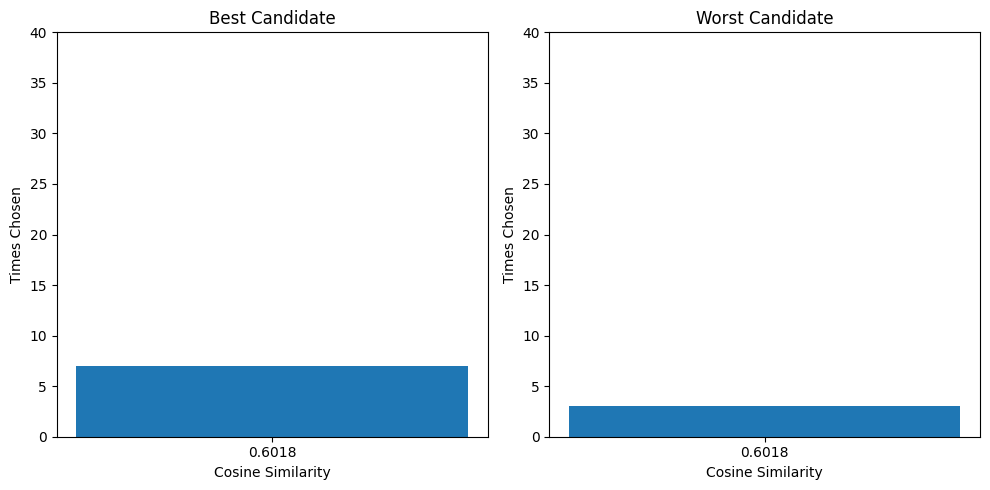

Best Choice: 1  What are the nationalities of the top-scoring drivers from the results table, ordered by their fastest lap speed in descending order, and show only the top-scoring driver?





IndexError: index 2 is out of bounds for axis 0 with size 0

<Figure size 640x480 with 0 Axes>

In [15]:
llsample.compare_responses(True)

In [9]:
# sampling approach - finetuned train samples
ftsample = SAMPLING(PAYLOADS.FINE_TUNE_8B, train_mini, noQueries)
ftsample.generate_samples(test_mini)

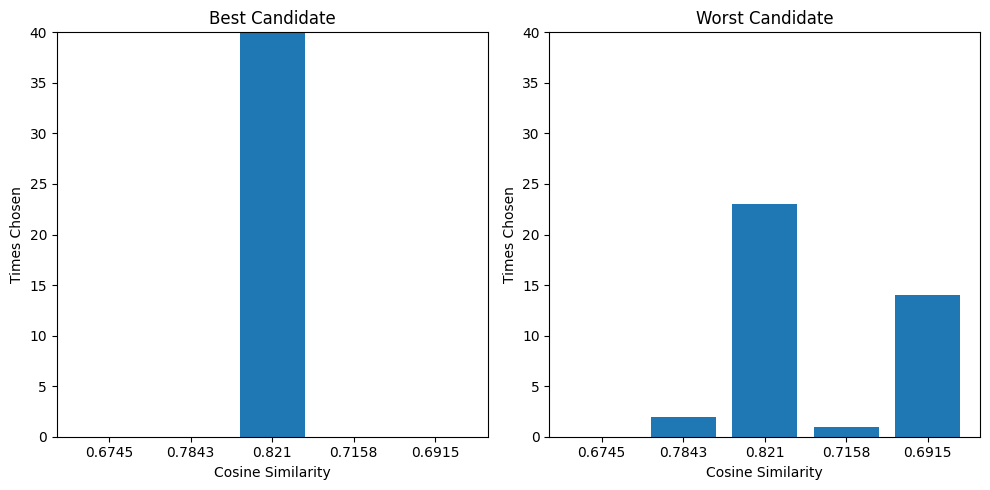

Best Choice: 3  List the names and heights (in cm) of superheroes published by Marvel Comics, along with the rank of each superhero by their height in descending order.





<Figure size 640x480 with 0 Axes>

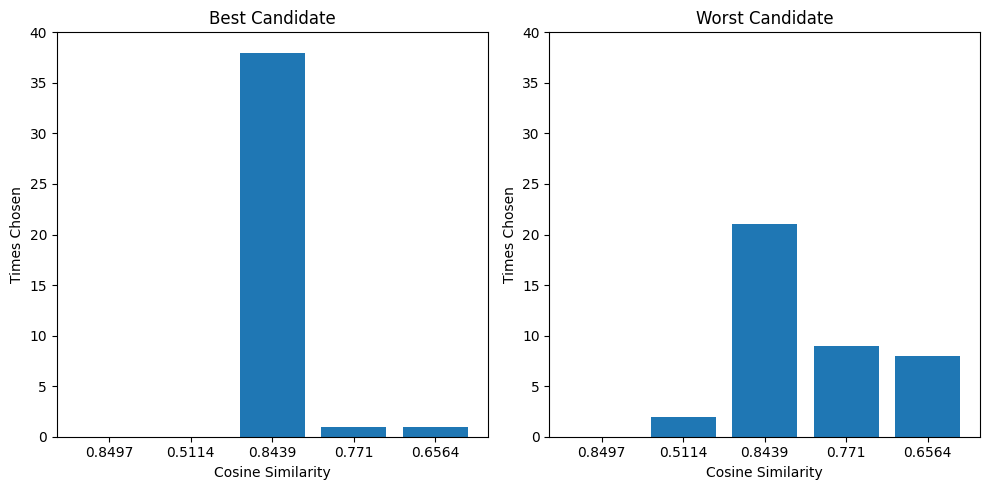

Best Choice: 3  What is the number of tests taken by students from the school with the highest FRPM Count (K-12)?





<Figure size 640x480 with 0 Axes>

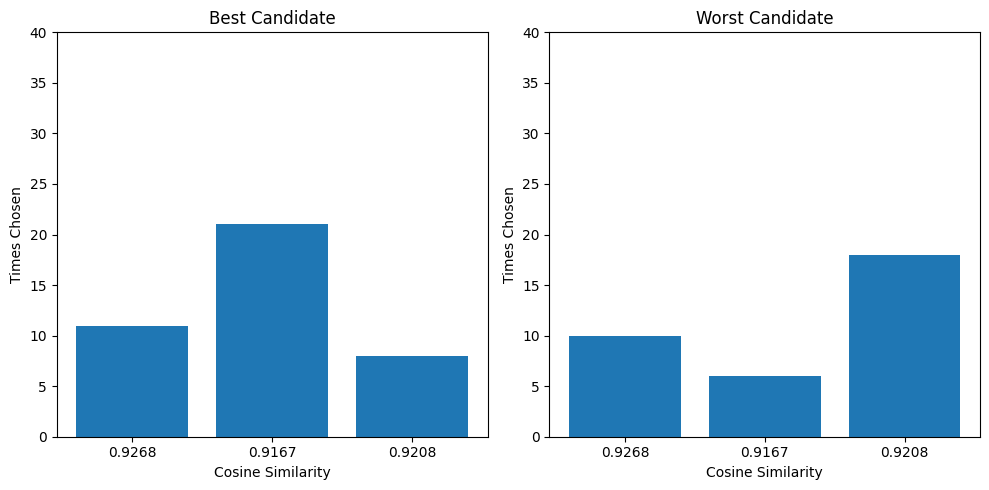

Best Choice: 2  What is the nationality of the driver with the fastest lap speed?





<Figure size 640x480 with 0 Axes>

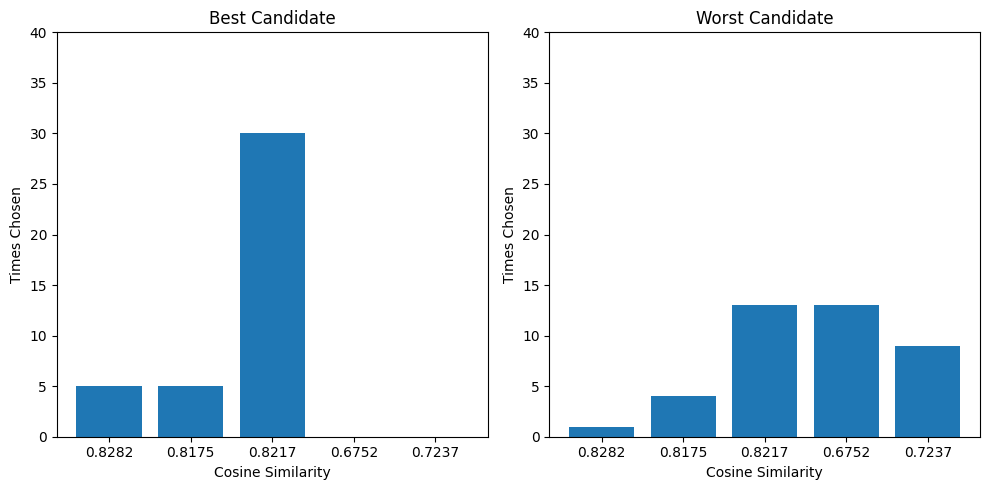

Best Choice: 3  What are the names and results of battles led by a Bulgarian commander other than Boril?





<Figure size 640x480 with 0 Axes>

In [10]:
ftsample.compare_responses(True)